<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [23]:
# imports
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import keras

from tensorflow.keras.datasets import mnist
%load_ext tensorboard
import tensorflow as tf
import os
import datetime

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
# loading data into train/test
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [6]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
# transforming the data to be on same scale
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# instantiating a model object
model = Sequential()

# adding layers to the model
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

# compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')

# fitting the model, The MSE of the final epoch was 19.5564
model = model.fit(x=X_train, 
          y=y_train, 
          epochs=1000, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/1000
13/13 [==============================] - 0s 16ms/step - loss: 585.3469 - mse: 585.3469 - val_loss: 615.0735 - val_mse: 615.0735
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 580.6304 - mse: 580.6304 - val_loss: 603.4903 - val_mse: 603.4903
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 566.1069 - mse: 566.1069 - val_loss: 582.3175 - val_mse: 582.3175
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 544.0364 - mse: 544.0364 - val_loss: 551.3398 - val_mse: 551.3398
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 508.7115 - mse: 508.7115 - val_loss: 508.7864 - val_mse: 508.7864
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 463.8694 - mse: 463.8694 - val_loss: 452.4063 - val_mse: 452.4063
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 407.7418 - mse: 407.7418 - val_loss: 382.7542 - val_mse: 382.7542
Epoch 8/1000
13/13 

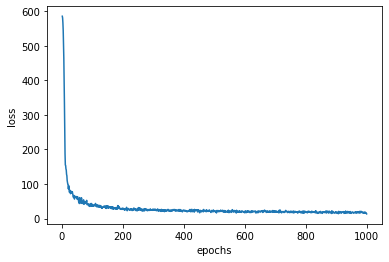

In [ ]:
# using history to make a graph
history = model.history
df = pd.DataFrame(data={
    'epochs':[x + 1 for x in range(len(history['loss']))],
    'loss':history['loss'],
    'mse':history['mse'],
    'val_loss':history['val_loss'],
    'val_mse':history['val_mse'],
})

sns.lineplot(x='epochs', y='loss', data=df);

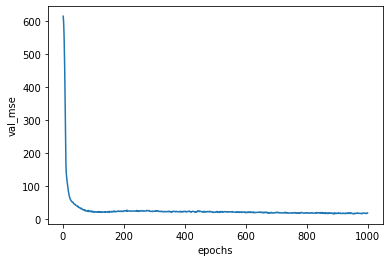

In [ ]:
sns.lineplot(x='epochs', y='val_mse', data=df);

In [ ]:
# running linear regression, the neural network has a better accuracy
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

23.19559925642293

In [7]:
# feature engineering
# per capita crime per proportion of residential land
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [24]:
# loading the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
# corresponding categories for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics='accuracy')
model = model.fit(x=X_train, 
          y=y_train, 
          epochs=100, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4378 - accuracy: 0.1780 - val_loss: 2.1348 - val_accuracy: 0.1710
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1379 - accuracy: 0.1784 - val_loss: 2.1216 - val_accuracy: 0.1901
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1916 - accuracy: 0.1646 - val_loss: 2.1698 - val_accuracy: 0.1558
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1279 - accuracy: 0.1819 - val_loss: 2.1507 - val_accuracy: 0.1860
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1407 - accuracy: 0.1850 - val_loss: 2.1602 - val_accuracy: 0.1820
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1340 - accuracy: 0.1802 - val_loss: 2.1170 - val_accuracy: 0.1830
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1318 - accuracy: 0.1814 - val_loss: 2.1157 - val_ac

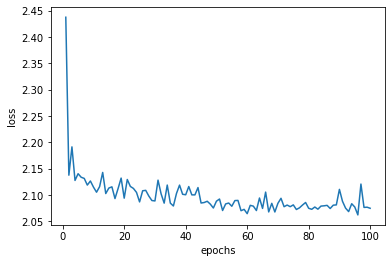

In [28]:
# using history to make a graph
history = model.history
df = pd.DataFrame(data={
    'epochs':[x + 1 for x in range(len(history['loss']))],
    'loss':history['loss'],
    'accuracy':history['accuracy'],
    'val_loss':history['val_loss'],
    'val_accuracy':history['val_accuracy'],
})

sns.lineplot(x='epochs', y='loss', data=df);

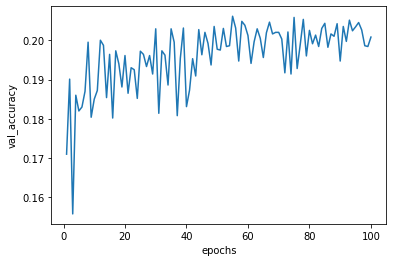

In [29]:
sns.lineplot(x='epochs', y='val_accuracy', data=df);

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.